In [1]:
import anndata
import pandas as pd
import numpy as np
from pandas import *
from sklearn import preprocessing
import random
import pickle

In [2]:
merge = anndata.read_h5ad("./sample/merge_sct.h5ad")
query = anndata.read_h5ad("./sample/sample.h5ad")
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(merge.X)
df = df.transpose()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df)
df = df.transpose()
df.index = merge.obs.index.values
df.columns = merge.var.index.values
l = query.obs.index.tolist()
sample = df.loc[l]
sample

,ENSG00000132465,ENSG00000211592,ENSG00000211677,ENSG00000211895,ENSG00000163220,ENSG00000143546,ENSG00000211679,ENSG00000115523,ENSG00000211899,ENSG00000107317,...,ENSG00000181163,ENSG00000130429,ENSG00000213719,ENSG00000133872,ENSG00000108107,ENSG00000198727,ENSG00000241343,ENSG00000255325,ENSG00000146278,ENSG00000134201
TGCGCAGCATCAGTAC-19,0.503419,1.000000,0.441148,0.707511,0.057549,0.110535,0.310952,0.000000,0.264991,0.317677,...,0.343373,0.341747,0.352115,0.319445,0.311611,0.370466,0.393582,0.369410,0.328479,0.369108
AAGGTTCCAACCGCCA-28,0.342261,0.299407,1.000000,0.348240,0.065036,0.110486,1.000000,0.000000,1.000000,0.317841,...,0.353809,0.319618,0.320226,0.322888,0.330256,0.394104,0.301186,0.370222,0.393368,0.369921
CTACCCACAGATGGGT-15,0.330620,0.220530,0.284177,0.403575,0.142602,0.193052,0.310711,0.000000,0.255585,0.324970,...,0.331830,0.522567,0.392866,0.333221,0.360797,0.356063,0.378431,0.377776,0.375635,0.377466
ATAAGAGCACTAGTAC-26,0.330759,0.190778,1.000000,0.397537,0.052791,0.101537,1.000000,0.000000,1.000000,0.307017,...,0.397787,0.366803,0.315228,0.341888,0.381798,0.328277,0.409144,0.361679,0.352026,0.361374
TTATGCTCAATGCCAT-2,0.266352,0.148202,0.241751,0.284668,0.000000,0.060350,0.258447,1.000000,0.197461,0.392465,...,0.310102,0.323897,0.409631,0.294468,0.232291,0.365432,0.348559,0.322036,0.378800,0.321716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCTTTCCAGTGAAGAG-10,1.000000,1.000000,0.288402,0.985170,0.086249,0.108075,0.305566,0.000000,0.256641,0.318316,...,0.333110,0.341481,0.404263,0.360291,0.390947,0.369140,0.365670,0.371893,0.367928,0.371590
AGTCTTTCAGCTGTTA-28,0.233909,0.093009,0.203745,0.260704,0.000000,0.039065,0.220085,0.456062,0.141617,0.214594,...,0.288970,0.261797,0.336115,0.243139,0.260755,0.217314,0.268835,0.275273,0.389680,0.274930
TTCTTAGTCTGCCCTA-17,0.276216,0.181637,0.228042,0.297762,0.000000,0.117286,0.248837,0.766531,0.193832,0.851122,...,0.276545,0.279196,0.295343,0.312750,0.234167,0.442885,0.256645,0.314515,0.433568,0.314194
GGACATTAGACGCTTT-16,0.330867,0.194152,0.278867,0.333137,0.055958,0.109943,0.308209,0.000000,0.246443,0.315693,...,0.432655,0.352205,0.319105,0.456419,0.389160,0.342242,0.421071,0.370782,0.360090,0.370483


In [3]:
#Fill zero when genes of the pretrained model are not included in the sample dataset.
gene_list = pd.read_csv("./pretrained/pretrained_genes.csv", index_col=0).index.tolist()
genes = sample.columns.values.tolist()
excluded_genes = list(set(gene_list) - set(genes)) 
blank_datarame = pd.DataFrame(np.zeros((len(sample.index.tolist()), len(excluded_genes))))
blank_datarame.index = sample.index.tolist()
blank_datarame.columns = excluded_genes
sample = pd.concat([sample, blank_datarame], axis=1)
sample = sample[gene_list]
sample

,ENSG00000188290,ENSG00000187608,ENSG00000186891,ENSG00000186827,ENSG00000162576,ENSG00000197530,ENSG00000189409,ENSG00000149527,ENSG00000235169,ENSG00000158292,...,ENSG00000282651,ENSG00000211972,ENSG00000204866,ENSG00000253998,ENSG00000147206,ENSG00000231475,ENSG00000211976,ENSG00000223350,ENSG00000241294,ENSG00000211951
TGCGCAGCATCAGTAC-19,0.353187,0.313630,0.350192,0.344606,0.366615,0.352591,0.356347,0.372205,0.362515,0.365415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGGTTCCAACCGCCA-28,0.353290,0.327589,0.359320,0.355221,0.367358,0.464297,0.358002,0.367692,0.371730,0.376264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTACCCACAGATGGGT-15,0.365497,0.323656,0.357084,0.359273,0.374747,0.351537,0.366178,0.371153,0.375267,0.373464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATAAGAGCACTAGTAC-26,0.342623,0.329513,0.344185,0.347491,0.358788,0.355232,0.349362,0.366934,0.355117,0.366418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTATGCTCAATGCCAT-2,0.353192,0.416368,0.593178,0.297091,0.319018,0.411842,0.326858,0.343122,0.315107,0.337012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCTTTCCAGTGAAGAG-10,0.353038,0.398360,0.343756,0.348181,0.369026,0.353432,0.354453,0.385621,0.380147,0.367765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGTCTTTCAGCTGTTA-28,0.257389,0.348193,0.269382,0.276450,0.272219,0.292961,0.736439,0.292936,0.280925,0.270914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCTTAGTCTGCCCTA-17,0.273181,0.325482,0.332640,0.296857,0.311561,0.321552,0.282560,0.312509,0.307776,0.337538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGACATTAGACGCTTT-16,0.362802,0.324918,0.354029,0.358053,0.367974,0.448941,0.359104,0.347200,0.363511,0.366720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Use the trained image transormer to tansform the sample dataset
file = open("./pretrained/img_transformer_pre.obj",'rb')
it = pickle.load(file)
file.close()
path = '/Usersdata/shangru/docker/sample/sample_query.npy'
query_img = (it.transform(sample)*255).astype(np.uint8)
np.save(path, query_img)

In [5]:
from torchvision import transforms
import torch
from torch import nn
import torch.optim as optim
import argparse
import torch.optim.lr_scheduler as lr_scheduler 
from efficientnet_pytorch import EfficientNet
from torch.utils.data import Dataset
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')
class MyTestSet(Dataset):
    def __init__(self, img):
        self.img = np.load(img)
        self.transforms = transforms.Compose([transforms.ToTensor(), ])
    def __getitem__(self, index):
        img = self.img[index, :, :, :]
        img = np.squeeze(img)
        img = Image.fromarray(np.uint8(img))
        img = self.transforms(img)
        return img
    def __len__(self):
        return self.img.shape[0]

test = MyTestSet("/Usersdata/shangru/docker/sample/sample_query.npy")
test_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False)

os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
mod =EfficientNet.from_pretrained('efficientnet-b3', num_classes=31)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    mod = nn.DataParallel(mod)

torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.get_device_name()

mod.to(device)
mod = mod.to(device)
#Use pretrained model to predict cell types on the sample query dataset
mod.load_state_dict(torch.load(("./pretrained/checkpoint_model_pre.pth")))
mod.eval()

out = []
for i, data in enumerate(test_loader):
    query = data
    query = query.to(device)
    pred= mod(query)
    _, predicted = torch.max(pred.data, 1)
    out.append(predicted)

pred = torch.cat(out, dim=0)
pr = pred.cpu().numpy()

Loaded pretrained weights for efficientnet-b3


In [6]:
real_label = pd.read_csv("./sample/real_sample_labels.csv", index_col=0)
real_label.value_counts()

celltype         
NK                   4390
B naive              1178
CD8 TEM              1173
CD14 Mono            1084
CD8 Naive             621
CD16 Mono             536
B memory              396
CD4 TCM               185
CD4 Naive             162
cDC2                  136
Plasmablast           130
gdT                    74
HSPC                   41
pDC                    40
B intermediate         29
NK Proliferating       15
Treg                   11
MAIT                   10
NK_CD56bright           7
Platelet                7
CD8 TCM                 1
CD4 TEM                 1
dnT                     1
CD4 Proliferating       1
dtype: int64

In [7]:
file = open("./pretrained/label_encoder_pre.obj",'rb')
le = pickle.load(file)
file.close()
pred_label = le.inverse_transform(pr)
pred_label = pd.DataFrame(pred_label)
pred_label.value_counts()

NK                   4216
CD14 Mono            1162
B naive              1131
CD8 TEM              1042
CD8 Naive             523
CD16 Mono             508
B memory              401
CD4 Naive             243
CD4 TCM               205
Plasmablast           130
gdT                   129
cDC2                  117
B intermediate         72
CD4 TEM                54
NK_CD56bright          54
HSPC                   41
MAIT                   41
pDC                    40
CD4 CTL                36
CD8 TCM                33
NK Proliferating       24
Platelet               11
Treg                   10
Doublet                 3
dnT                     2
CD4 Proliferating       1
dtype: int64

In [8]:
ls = list(set(pd.unique(pred_label[0]).tolist()) | set(pd.unique(real_label["celltype"]).tolist()))
acc = accuracy_score(pred_label,real_label)

le2 = preprocessing.LabelEncoder()
le2.fit(ls)
pred_label_2 = le2.transform(pred_label[0])
real_label_2 = le2.transform(real_label["celltype"])
ari = adjusted_rand_score(real_label_2, pred_label_2)

print("Accuray: %.03f, ARI = %.03f" % (acc, ari))

Accuray: 0.948, ARI = 0.937


In [9]:
from sklearn.metrics import f1_score
f1_weighted = f1_score(real_label_2, pred_label_2, average='weighted')
print("F1-score(weighted): %.03f" % f1_weighted)

F1-score(weighted): 0.959


In [10]:
import torch.nn.functional as nnf
pros = []
for i, data in enumerate(test_loader):
    query = data
    query = query.to(device)
    pred = mod(query)
    p = nnf.softmax(pred.data).cpu()
    pros.append(p)

In [11]:
prob = torch.cat(pros, dim=0)
prob

tensor([[0.0032, 0.0035, 0.8998,  ..., 0.0032, 0.0033, 0.0032],
        [0.0033, 0.0033, 0.0031,  ..., 0.0033, 0.0035, 0.0032],
        [0.0032, 0.0034, 0.0034,  ..., 0.0034, 0.0035, 0.0033],
        ...,
        [0.0033, 0.0032, 0.0034,  ..., 0.0033, 0.0035, 0.0034],
        [0.0031, 0.0032, 0.0033,  ..., 0.0031, 0.0035, 0.0031],
        [0.0024, 0.0021, 0.0020,  ..., 0.0022, 0.0022, 0.0027]])

In [12]:
max_prob, predicted_classes = torch.max(prob, axis=1)
max_prob

tensor([0.8998, 0.9006, 0.9000,  ..., 0.8979, 0.9024, 0.9349])

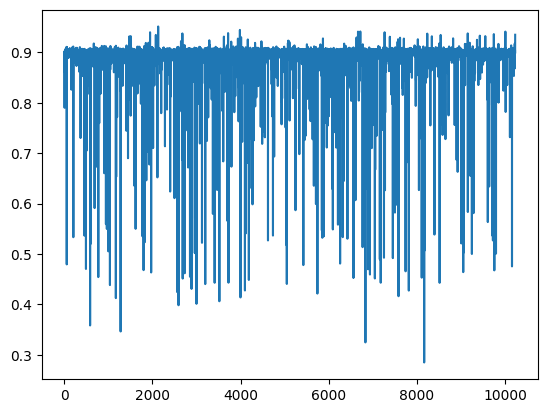

In [13]:
plt.plot(max_prob)

<AxesSubplot:ylabel='Density'>

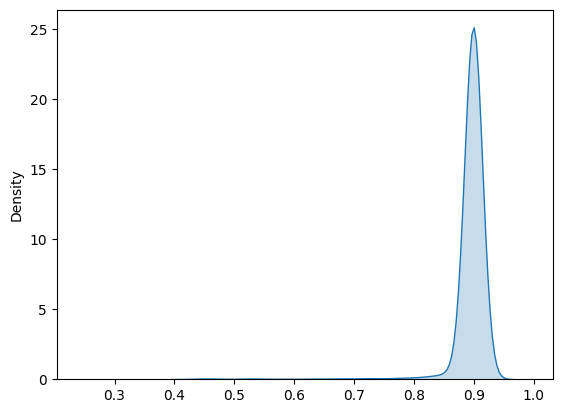

In [14]:
import seaborn as sns
sns.kdeplot(max_prob, bw_adjust=2, fill=True)